In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

In [2]:
# !pip install matplotlib seaborn

In [3]:
data = pd.read_csv('train.csv')
data

,Unnamed: 0,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,25629,INN25630,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,14473,INN14474,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,23720,INN23721,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,5843,INN05844,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,18709,INN18710,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29015,16850,INN16851,2,0,2,2,Meal Plan 1,0,Room_Type 1,43,2017,12,26,Offline,0,0,0,55.00,2,Not_Canceled
29016,6265,INN06266,1,0,0,2,Meal Plan 2,0,Room_Type 1,102,2017,10,16,Online,0,0,0,80.00,0,Canceled
29017,11284,INN11285,2,0,0,2,Meal Plan 1,0,Room_Type 1,5,2018,5,24,Corporate,0,0,0,110.00,1,Not_Canceled
29018,860,INN00861,2,0,0,3,Meal Plan 1,0,Room_Type 1,213,2018,6,7,Online,0,0,0,130.00,0,Canceled


In [4]:
data.drop(columns=['Unnamed: 0', 'Booking_ID'], inplace=True)

In [5]:
data.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [6]:
data.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [7]:
data[data.duplicated()]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
197,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.0,0,Canceled
216,2,0,0,3,Meal Plan 1,0,Room_Type 1,304,2018,11,3,Online,0,0,0,89.0,0,Canceled
249,2,0,1,4,Meal Plan 1,0,Room_Type 1,275,2018,10,5,Offline,0,0,0,90.0,0,Canceled
284,1,0,0,1,Meal Plan 1,0,Room_Type 1,99,2018,2,19,Corporate,0,0,0,81.0,0,Not_Canceled
310,1,0,0,2,Meal Plan 1,0,Room_Type 1,192,2018,6,24,Offline,0,0,0,95.0,0,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29010,2,0,0,5,Meal Plan 2,0,Room_Type 1,230,2018,9,6,Online,0,0,0,137.0,0,Canceled
29011,2,0,0,2,Meal Plan 2,0,Room_Type 1,257,2017,7,1,Online,0,0,0,101.5,0,Canceled
29016,1,0,0,2,Meal Plan 2,0,Room_Type 1,102,2017,10,16,Online,0,0,0,80.0,0,Canceled
29017,2,0,0,2,Meal Plan 1,0,Room_Type 1,5,2018,5,24,Corporate,0,0,0,110.0,1,Not_Canceled


In [8]:
data.drop_duplicates(inplace=True)

In [9]:
data.duplicated().sum()

np.int64(0)

In [10]:
data.shape

(21359, 18)

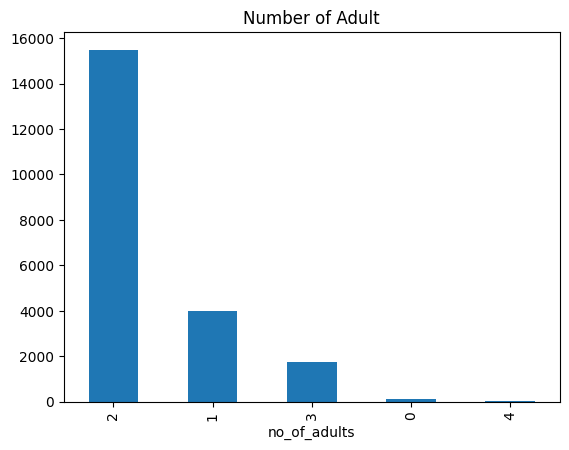

In [11]:
data['no_of_adults'].value_counts().plot(kind='bar', title='Number of Adult');

#### kebanyakan orang yang reservasi itu 2 orang saja / secara berpasangan

In [12]:
data['no_of_previous_cancellations'].value_counts()

no_of_previous_cancellations
0     21135
1       115
2        36
3        32
11       20
5        10
4         9
13        1
6         1
Name: count, dtype: int64

In [13]:
data['no_of_previous_bookings_not_canceled'].value_counts()

no_of_previous_bookings_not_canceled
0     20711
1       180
2        89
3        65
4        54
5        47
6        29
8        20
7        18
9        16
10       14
11       11
12       10
14        8
15        7
13        6
19        6
22        5
21        5
18        5
20        4
16        4
25        3
23        3
24        3
17        3
29        2
28        2
27        2
44        2
48        2
43        1
33        1
36        1
34        1
31        1
46        1
57        1
38        1
47        1
40        1
56        1
30        1
55        1
50        1
53        1
58        1
52        1
42        1
35        1
49        1
45        1
26        1
51        1
Name: count, dtype: int64

In [14]:
cat_cols = data.select_dtypes(exclude=np.number)
num_cols = data.select_dtypes(include=np.number)
cat_cols

,type_of_meal_plan,room_type_reserved,market_segment_type,booking_status
0,Meal Plan 1,Room_Type 1,Online,Not_Canceled
1,Meal Plan 1,Room_Type 1,Online,Not_Canceled
2,Meal Plan 1,Room_Type 1,Offline,Canceled
3,Meal Plan 1,Room_Type 1,Offline,Not_Canceled
4,Meal Plan 1,Room_Type 1,Offline,Canceled
...,...,...,...,...
29012,Meal Plan 1,Room_Type 4,Online,Canceled
29013,Meal Plan 1,Room_Type 1,Online,Not_Canceled
29014,Meal Plan 1,Room_Type 4,Online,Not_Canceled
29015,Meal Plan 1,Room_Type 1,Offline,Not_Canceled


In [15]:
num_cols

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,1,2,1,0,26,2017,10,17,0,0,0,161.00,0
1,2,1,1,1,0,98,2018,7,16,0,0,0,121.50,2
2,2,0,0,3,0,433,2018,9,8,0,0,0,70.00,0
3,2,0,2,5,0,195,2018,8,8,0,0,0,72.25,0
4,1,0,0,2,0,188,2018,6,15,0,0,0,130.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29012,3,0,0,1,0,65,2018,6,21,0,0,0,132.30,0
29013,2,0,2,3,0,86,2018,6,17,0,0,0,126.90,1
29014,2,0,0,2,0,0,2018,10,12,0,0,0,139.50,1
29015,2,0,2,2,0,43,2017,12,26,0,0,0,55.00,2


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21359 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21359 non-null  int64  
 1   no_of_children                        21359 non-null  int64  
 2   no_of_weekend_nights                  21359 non-null  int64  
 3   no_of_week_nights                     21359 non-null  int64  
 4   type_of_meal_plan                     21359 non-null  object 
 5   required_car_parking_space            21359 non-null  int64  
 6   room_type_reserved                    21359 non-null  object 
 7   lead_time                             21359 non-null  int64  
 8   arrival_year                          21359 non-null  int64  
 9   arrival_month                         21359 non-null  int64  
 10  arrival_date                          21359 non-null  int64  
 11  market_segment_type 

In [17]:
for i in cat_cols:
    print(f'kolom : {i} \n')
    print(data[i].value_counts())
    print('-------------------------------')
    print('-------------------------------')
    

kolom : type_of_meal_plan 

type_of_meal_plan
Meal Plan 1     16759
Not Selected     3627
Meal Plan 2       969
Meal Plan 3         4
Name: count, dtype: int64
-------------------------------
-------------------------------
kolom : room_type_reserved 

room_type_reserved
Room_Type 1    15375
Room_Type 4     4403
Room_Type 6      758
Room_Type 2      500
Room_Type 5      190
Room_Type 7      129
Room_Type 3        4
Name: count, dtype: int64
-------------------------------
-------------------------------
kolom : market_segment_type 

market_segment_type
Online           16324
Offline           3471
Corporate         1192
Complementary      291
Aviation            81
Name: count, dtype: int64
-------------------------------
-------------------------------
kolom : booking_status 

booking_status
Not_Canceled    15231
Canceled         6128
Name: count, dtype: int64
-------------------------------
-------------------------------


In [18]:
cat_cols

,type_of_meal_plan,room_type_reserved,market_segment_type,booking_status
0,Meal Plan 1,Room_Type 1,Online,Not_Canceled
1,Meal Plan 1,Room_Type 1,Online,Not_Canceled
2,Meal Plan 1,Room_Type 1,Offline,Canceled
3,Meal Plan 1,Room_Type 1,Offline,Not_Canceled
4,Meal Plan 1,Room_Type 1,Offline,Canceled
...,...,...,...,...
29012,Meal Plan 1,Room_Type 4,Online,Canceled
29013,Meal Plan 1,Room_Type 1,Online,Not_Canceled
29014,Meal Plan 1,Room_Type 4,Online,Not_Canceled
29015,Meal Plan 1,Room_Type 1,Offline,Not_Canceled


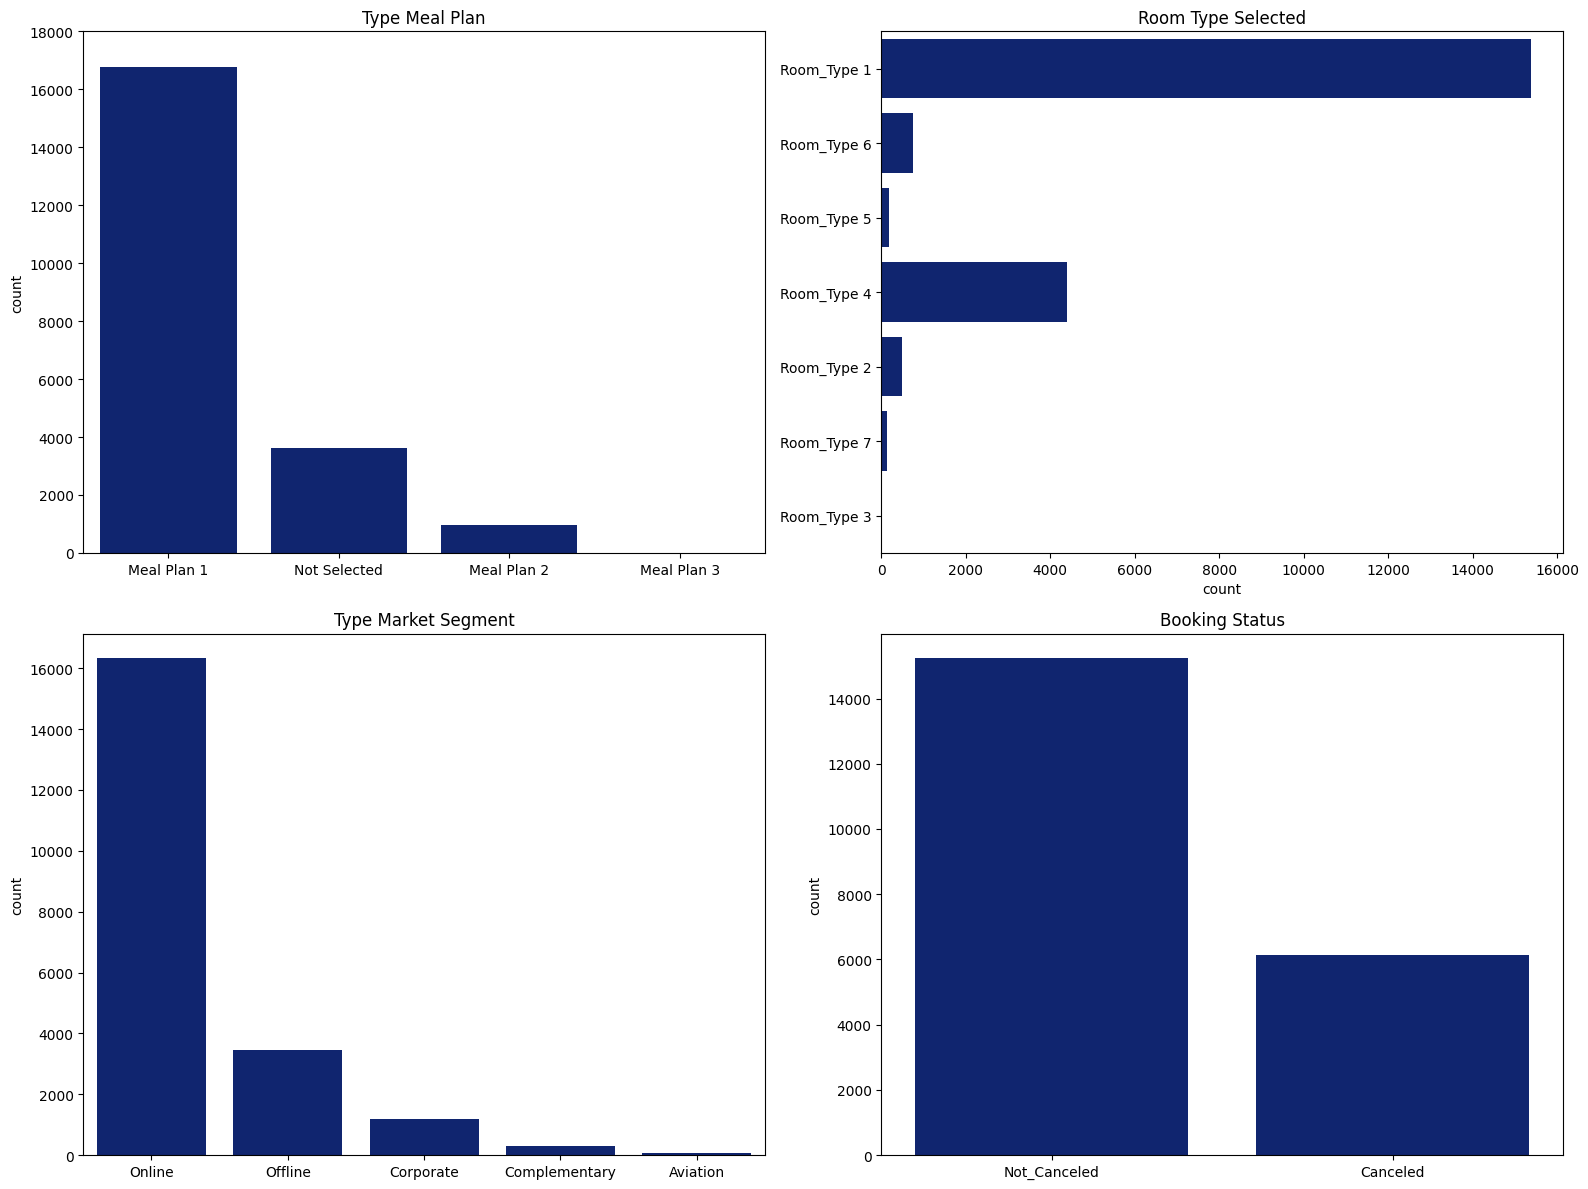

In [19]:
sns.set_palette('dark')
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

sns.countplot(data=cat_cols, x='type_of_meal_plan', ax=ax[0, 0])
ax[0, 0].set_title('Type Meal Plan')
ax[0, 0].set_ylim(0, 18000)
ax[0, 0].set_xlabel(None)

sns.countplot(data=cat_cols, y='room_type_reserved', ax=ax[0, 1])
ax[0, 1].set_title('Room Type Selected')
ax[0, 1].set_ylabel(None)

sns.countplot(data=cat_cols, x='market_segment_type', ax=ax[1, 0])
ax[1, 0].set_title('Type Market Segment')
ax[1, 0].set_xlabel(None)

sns.countplot(data=cat_cols, x='booking_status', ax=ax[1, 1])
ax[1, 1].set_title('Booking Status')
ax[1, 1].set_xlabel(None)

plt.tight_layout()
plt.show()

##### - untuk tipe kamar yang kebanyakan dipilih adalah tipe 1 artinya mostly orang yang pesan hotel dengan ukuran kamar yang lebih kecil (sesuai dengan jumlah pengunjung hotel yang hanya kebanyak 2 orang saja)

In [20]:
data_year_2017 = data[data['arrival_year'] == 2017]['arrival_month'].value_counts().reset_index()
data_year_2017

,arrival_month,count
0,10,825
1,9,805
2,12,542
3,8,521
4,11,373
5,7,152


In [21]:
data_year_2018 = data[data['arrival_year'] == 2018]['arrival_month'].value_counts().reset_index()
data_year_2018

,arrival_month,count
0,8,1956
1,10,1838
2,7,1741
3,9,1720
4,4,1695
5,3,1611
6,6,1543
7,5,1522
8,11,1444
9,12,1386


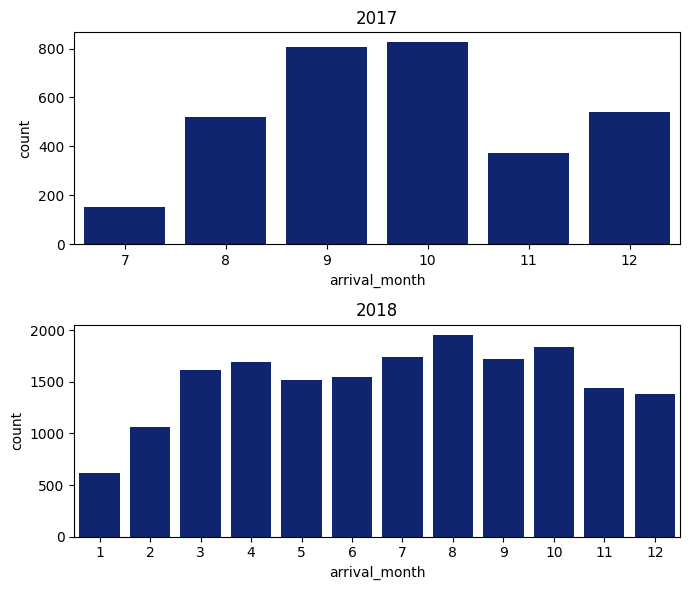

In [22]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(7, 6))

sns.barplot(data=data_year_2017, x='arrival_month', y='count', ax=ax[0])
ax[0].set_title('2017')

sns.barplot(data=data_year_2018, x='arrival_month', y='count', ax=ax[1])
ax[1].set_title('2018')

plt.tight_layout()

#### Jumlah pengunjung hotel disetiap bulannya dan kebanyakan berada dibulan agustus - oktober 

Text(0.5, 1.0, 'Persentase Booking Status')

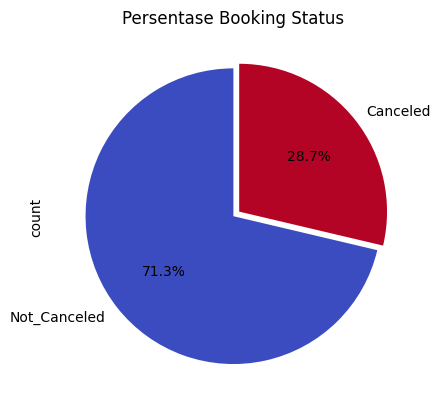

In [23]:
data['booking_status'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    explode=(0, 0.05),
    cmap='coolwarm'
)
plt.title('Persentase Booking Status')

#### Label tidak balance, lebih banyak yang tidak dibatalkan

In [24]:
df = data.copy()

In [25]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


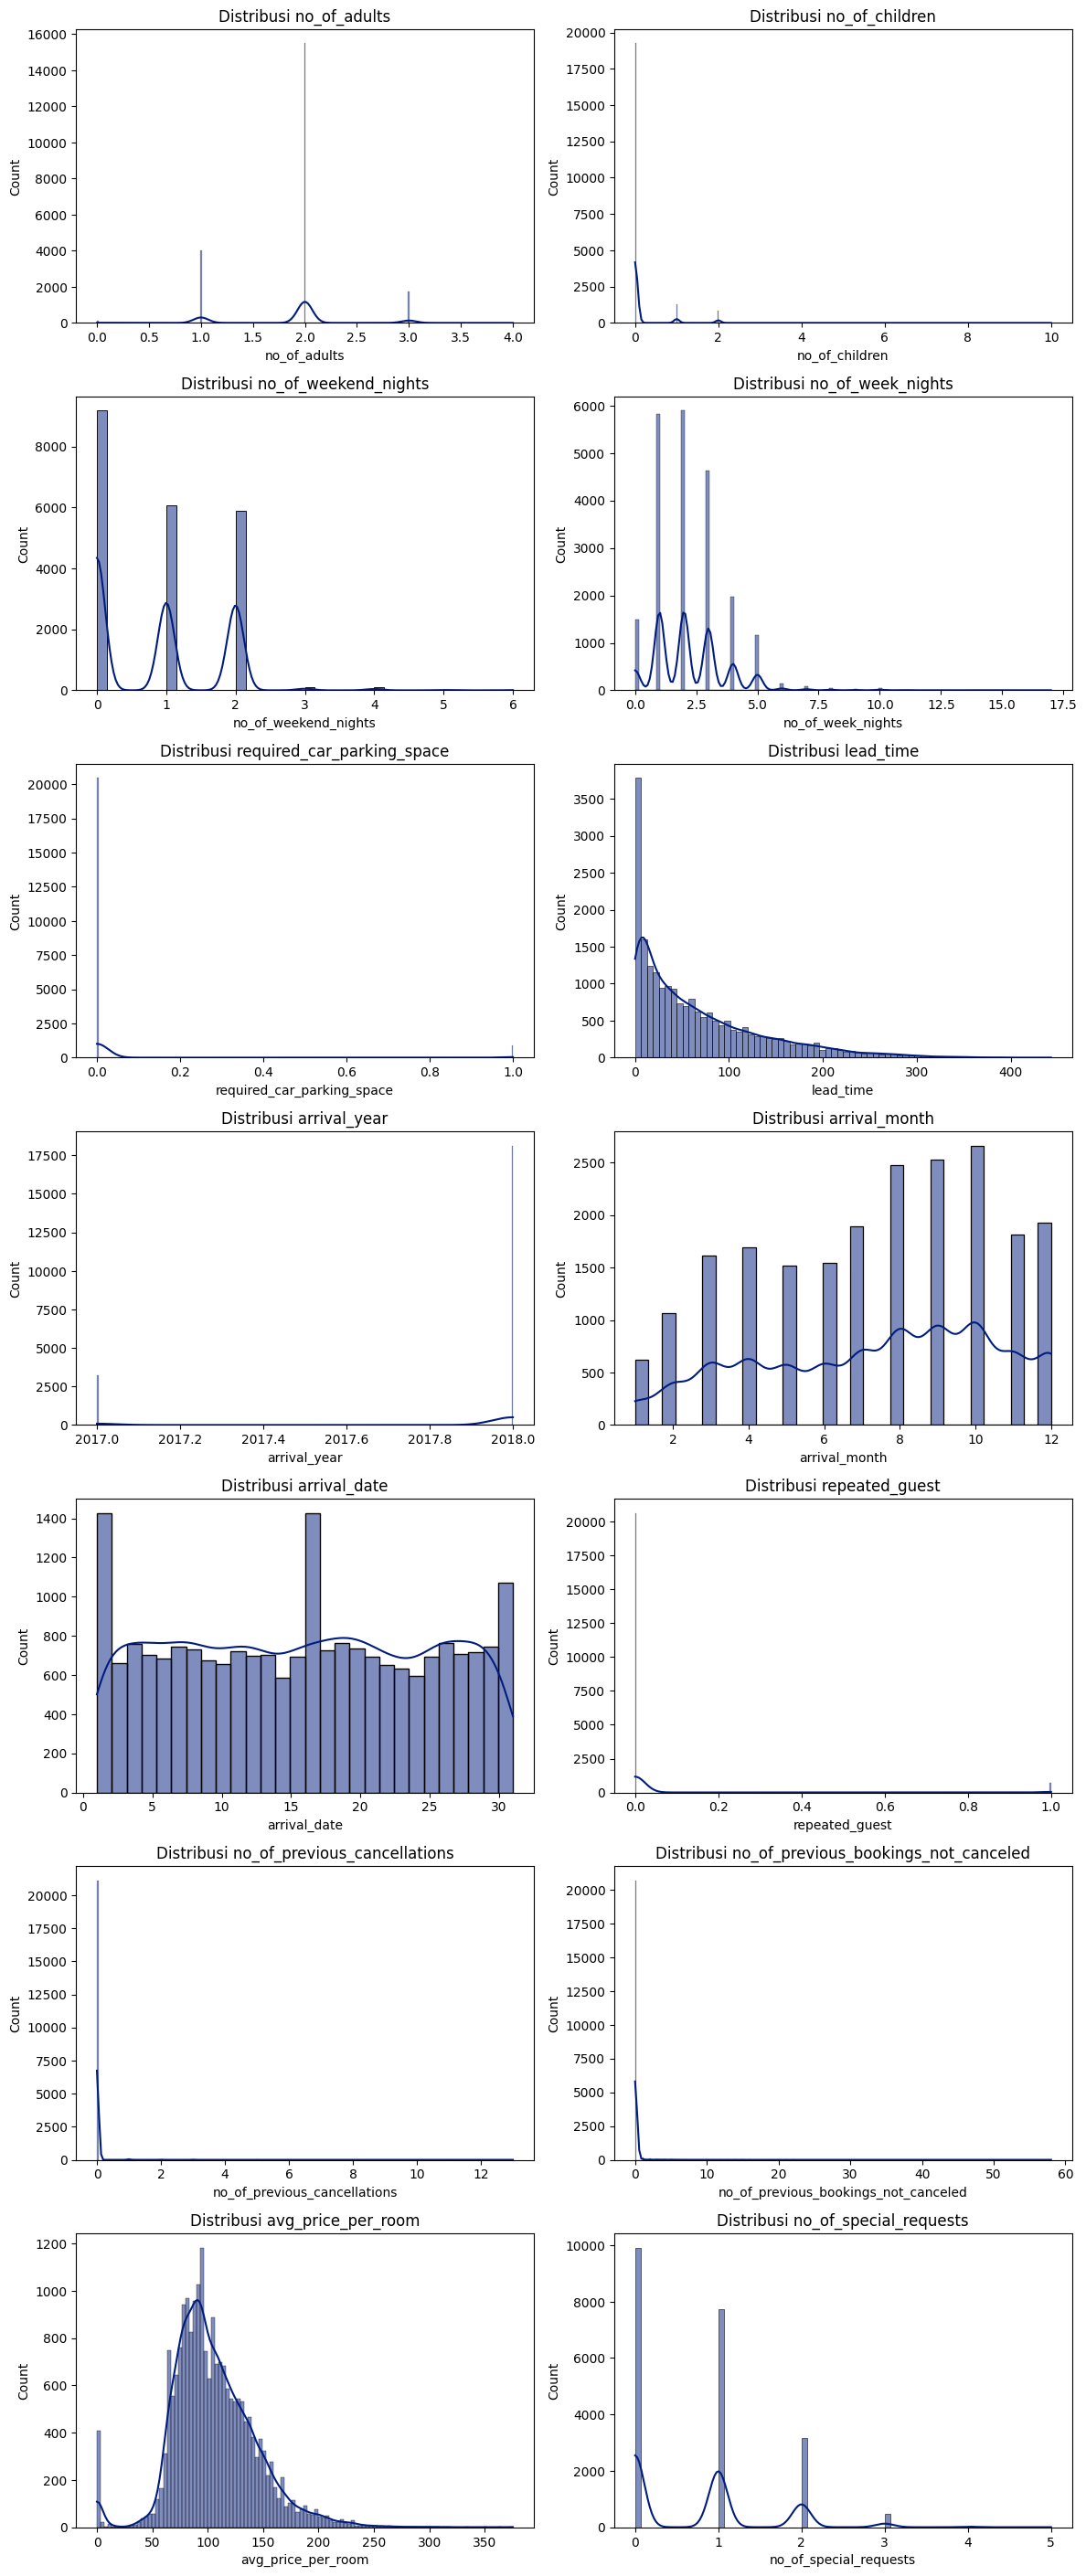

In [26]:
# 2. Atur grid (2 kolom, baris menyesuaikan)
ncols = 2
# nrows = math.ceil(n_features / ncols)

# 3. Buat canvas/figure
fig, axes = plt.subplots(nrows=14, ncols=ncols, figsize=(12, 14 * 4))
axes = axes.flatten() # Mengubah matriks axes menjadi list agar bisa diakses indexnya

# 4. LOOP YANG BENAR
for index, col in enumerate(num_cols):
    # Gunakan 'col' untuk nama kolom, dan 'axes[index]' untuk posisi grafik
    sns.histplot(data=data, x=col, ax=axes[index], kde=True)
    axes[index].set_title(f'Distribusi {col}')

# 5. Hapus kotak kosong jika jumlah fitur ganjil
for j in range(index + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [27]:
for index, cols in enumerate(num_cols):
     print(index, cols)

0 no_of_adults
1 no_of_children
2 no_of_weekend_nights
3 no_of_week_nights
4 required_car_parking_space
5 lead_time
6 arrival_year
7 arrival_month
8 arrival_date
9 repeated_guest
10 no_of_previous_cancellations
11 no_of_previous_bookings_not_canceled
12 avg_price_per_room
13 no_of_special_requests


## Bivariat Analysis

In [28]:
def plot_bivariat_num(df, target, num_features):  # berikan 3 parameter (dataframe, target kolom, feature numeric)
    num_plots = len(num_features)
    num_rows = (num_plots + 1) // 2  # jumlah baris tambah 1 agar jdi genap kemudian dibagi 2 (//) maksudnya agar hasil menjadi int

    fig, ax = plt.subplots(nrows=num_rows, ncols=2, figsize=(15, num_rows * 5))
    ax = ax.flatten()

    for i, column in enumerate(num_features):  # enumerate (mengambil index & nama column)
        sns.boxplot(data=df, x=target, y=column, ax=ax[i], palette='Blues')
        ax[i].set_title(f'{column} VS {target}')

    plt.tight_layout()
    plt.show()

In [29]:
# plot_bivariat_num(data, 'booking_status', num_cols)

In [30]:
for i, column in enumerate(num_cols):
    print(i, column)

0 no_of_adults
1 no_of_children
2 no_of_weekend_nights
3 no_of_week_nights
4 required_car_parking_space
5 lead_time
6 arrival_year
7 arrival_month
8 arrival_date
9 repeated_guest
10 no_of_previous_cancellations
11 no_of_previous_bookings_not_canceled
12 avg_price_per_room
13 no_of_special_requests


## Data Processing

In [31]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
label_encoder = LabelEncoder()

mappings = {}

for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])

    mappings[col] = {label:code for label, code in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))}

In [34]:
mappings

{'type_of_meal_plan': {'Meal Plan 1': np.int64(0),
  'Meal Plan 2': np.int64(1),
  'Meal Plan 3': np.int64(2),
  'Not Selected': np.int64(3)},
 'room_type_reserved': {'Room_Type 1': np.int64(0),
  'Room_Type 2': np.int64(1),
  'Room_Type 3': np.int64(2),
  'Room_Type 4': np.int64(3),
  'Room_Type 5': np.int64(4),
  'Room_Type 6': np.int64(5),
  'Room_Type 7': np.int64(6)},
 'market_segment_type': {'Aviation': np.int64(0),
  'Complementary': np.int64(1),
  'Corporate': np.int64(2),
  'Offline': np.int64(3),
  'Online': np.int64(4)},
 'booking_status': {'Canceled': np.int64(0), 'Not_Canceled': np.int64(1)}}

In [35]:
# cara membalikkan ke sebelum di label encoder (jalankan hanya sekali saja kalau lebih akan jdi nan)

# for col, vocab in mappings.items():
#     invers = {v : k for k, v in vocab.items()}

#     df[col] = df[col].map(invers)

In [ ]:
for col, mapping in mappings.items():
    print(col)

In [36]:
p

NameError: name 'p' is not defined

In [ ]:
for col, mapping in mappings.items():
    print(col)

type_of_meal_plan
room_type_reserved
market_segment_type
booking_status


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21359 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21359 non-null  int64  
 1   no_of_children                        21359 non-null  int64  
 2   no_of_weekend_nights                  21359 non-null  int64  
 3   no_of_week_nights                     21359 non-null  int64  
 4   type_of_meal_plan                     21359 non-null  int64  
 5   required_car_parking_space            21359 non-null  int64  
 6   room_type_reserved                    21359 non-null  int64  
 7   lead_time                             21359 non-null  int64  
 8   arrival_year                          21359 non-null  int64  
 9   arrival_month                         21359 non-null  int64  
 10  arrival_date                          21359 non-null  int64  
 11  market_segment_type 

## Cek korelasi semua fitur

<Axes: >

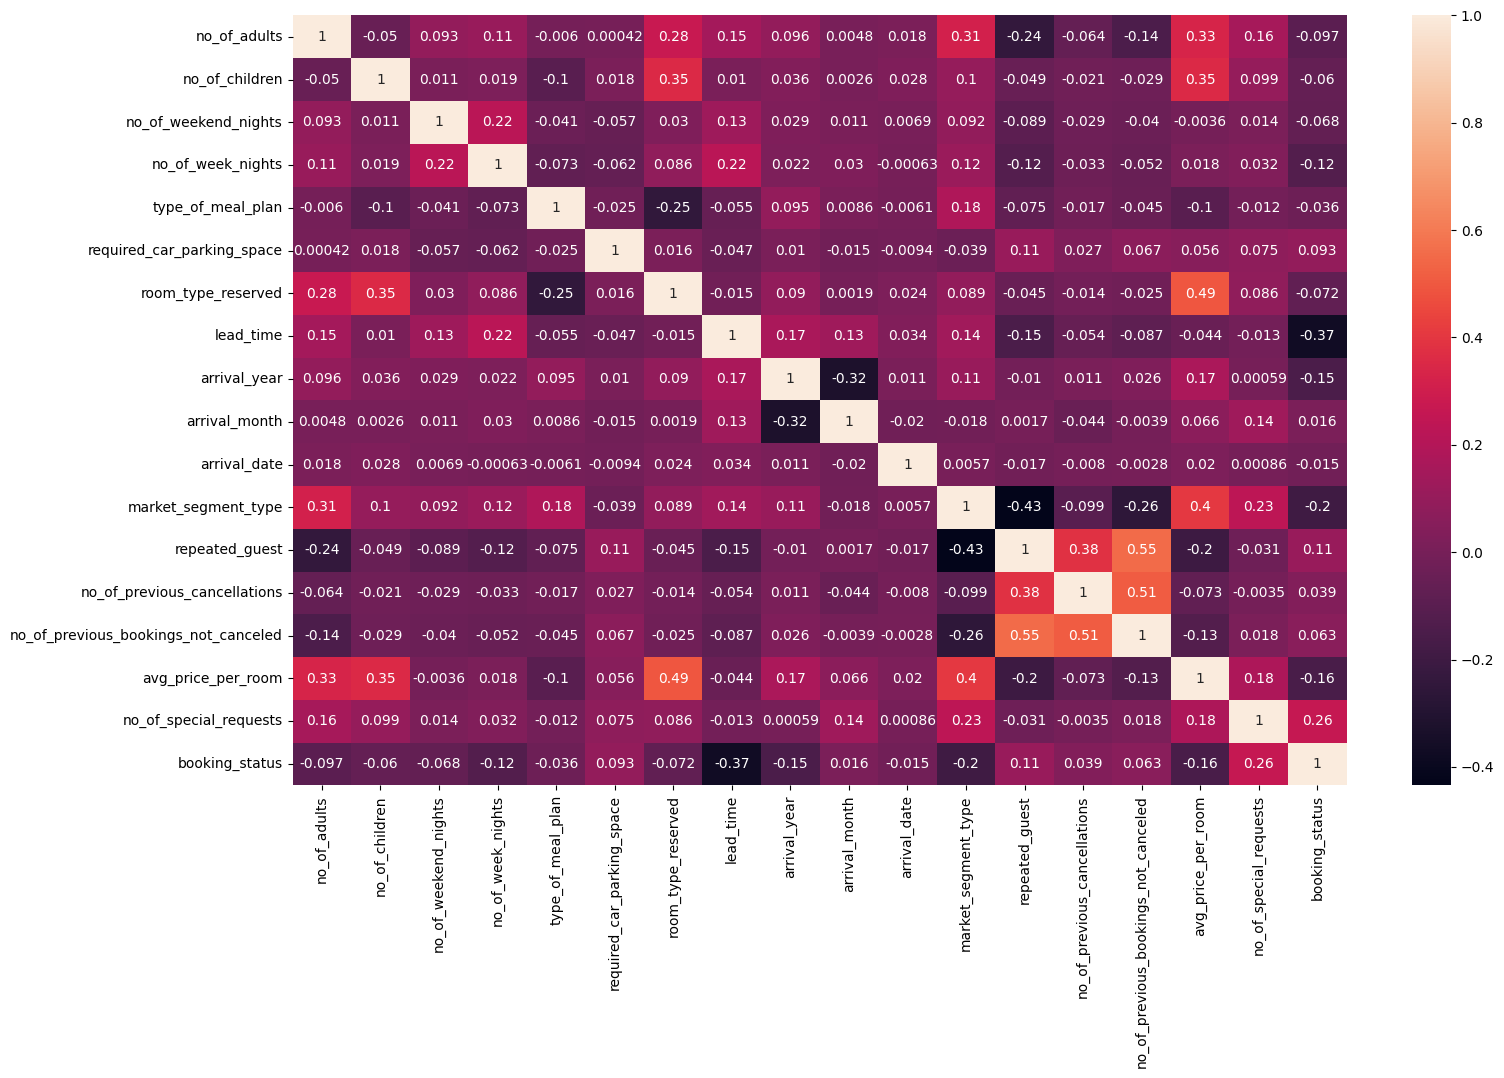

In [ ]:
plt.figure(figsize=(17, 10))
sns.heatmap(df.corr(), annot=True)

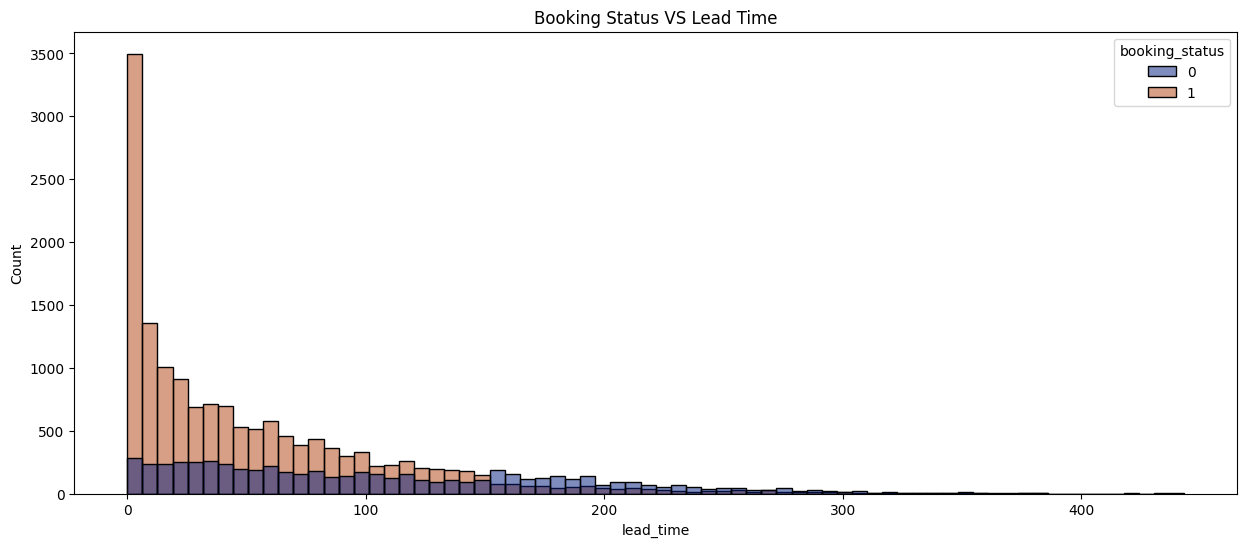

In [ ]:
plt.figure(figsize=(15, 6))
sns.histplot(data=df, x='lead_time', hue='booking_status')
plt.title('Booking Status VS Lead Time');

berdasarkan grafik seseorang yang memiliki lead time diatas 100 itu berpotensi untuk membatalkan reservasi hotel

In [ ]:
# !pip install statsmodels

## Cek multikolinearity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [ ]:
x = add_constant(df)

vif_data = pd.DataFrame()

vif_data['features'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

In [ ]:
# jika VIF lebih dari 5, 6, 7 maka bisa dikatakan ada multikolinearity, dan jika 10 itu sudah sangat tinggi untuk multikolinearity nya

vif_data

,features,VIF
0,const,4.100197e+07
1,no_of_adults,1.341180e+00
2,no_of_children,1.282459e+00
3,no_of_weekend_nights,1.073215e+00
4,no_of_week_nights,1.125260e+00
5,type_of_meal_plan,1.178228e+00
6,required_car_parking_space,1.036105e+00
7,room_type_reserved,1.549859e+00
8,lead_time,1.406287e+00
9,arrival_year,1.288533e+00


## Cek data yang skewness

In [ ]:
skewness = df.skew()
skewness

no_of_adults                            -0.305652
no_of_children                           4.165696
no_of_weekend_nights                     0.636637
no_of_week_nights                        1.553657
type_of_meal_plan                        1.650716
required_car_parking_space               4.538315
room_type_reserved                       1.392145
lead_time                                1.405258
arrival_year                            -1.953273
arrival_month                           -0.293266
arrival_date                             0.010333
market_segment_type                     -2.333046
repeated_guest                           5.282330
no_of_previous_cancellations            22.001489
no_of_previous_bookings_not_canceled    16.735934
avg_price_per_room                       0.542888
no_of_special_requests                   0.922373
booking_status                          -0.942305
dtype: float64

- Fitur yang memiliki nilai jauh di atas 1. Artinya, mayoritas data bernilai rendah, tapi ada sedikit data yang nilainya sangat tinggi (pencilan/outlier).<br><br>
contoh : no_of_previous_cancellations (22.00) & no_of_previous_bookings_not_canceled (16.73): Ini sangat ekstrem. Artinya, hampir semua tamu tidak pernah membatalkan/menginap sebelumnya (nilai 0), dan hanya segelintir orang yang punya riwayat banyak.<br><br>
- Nilainya di bawah -1. Artinya, data cenderung menumpuk di angka yang lebih besar.<br><br>
- Nilainya berada di kisaran -0.5 sampai 0.5. Data ini paling ideal untuk banyak algoritma Machine Learning.<br><br>
`**dan teknik untuk menghandle data skew ini bisa gunakan transformasi log**`

<Axes: xlabel='arrival_month', ylabel='Count'>

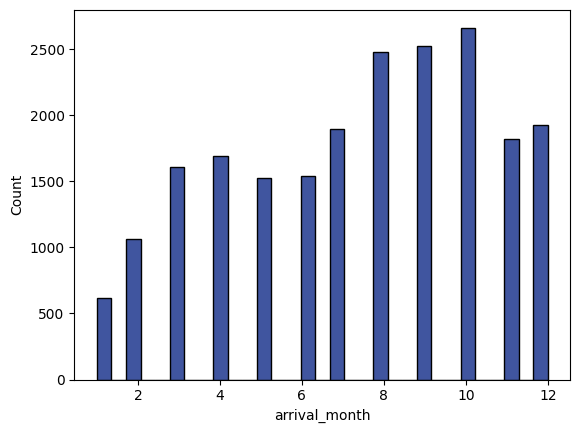

In [ ]:
sns.histplot(df, x='arrival_month')

In [ ]:
df['no_of_previous_cancellations'].value_counts()

no_of_previous_cancellations
0     21135
1       115
2        36
3        32
11       20
5        10
4         9
13        1
6         1
Name: count, dtype: int64

## Handle fitur yang skewness nya jauh pakai log

In [ ]:
for col in df.columns:
    if skewness[col] > 5:
        df[col] = np.log1p(df[col])

In [ ]:
skewness = df.skew()
skewness

# #no_of_adults                            -0.305652
# no_of_children                           4.165696
# no_of_weekend_nights                     0.636637
# no_of_week_nights                        1.553657
# type_of_meal_plan                        1.650716
# required_car_parking_space               4.538315
# room_type_reserved                       1.392145
# lead_time                                1.405258
# arrival_year                            -1.953273
# arrival_month                           -0.293266
# arrival_date                             0.010333
# market_segment_type                     -2.333046
# repeated_guest                           5.282330
# no_of_previous_cancellations            22.001489
# no_of_previous_bookings_not_canceled    16.735934
# avg_price_per_room                       0.542888
# no_of_special_requests                   0.922373
# booking_status                          -0.942305

no_of_adults                            -0.305652
no_of_children                           4.165696
no_of_weekend_nights                     0.636637
no_of_week_nights                        1.553657
type_of_meal_plan                        1.650716
required_car_parking_space               4.538315
room_type_reserved                       1.392145
lead_time                                1.405258
arrival_year                            -1.953273
arrival_month                           -0.293266
arrival_date                             0.010333
market_segment_type                     -2.333046
repeated_guest                           5.282330
no_of_previous_cancellations            13.270580
no_of_previous_bookings_not_canceled     7.619850
avg_price_per_room                       0.542888
no_of_special_requests                   0.922373
booking_status                          -0.942305
dtype: float64

In [ ]:
df['no_of_previous_cancellations'].value_counts()

# no_of_previous_cancellations
# 0     21135
# 1       115
# 2        36
# 3        32
# 11       20
# 5        10
# 4         9
# 13        1
# 6         1

no_of_previous_cancellations
0.000000    21135
0.693147      115
1.098612       36
1.386294       32
2.484907       20
1.791759       10
1.609438        9
2.639057        1
1.945910        1
Name: count, dtype: int64

## Cek Imbalance Data

In [ ]:
df['booking_status'].value_counts()

# 1 : Not Canceled
# 0 : Canceled

booking_status
1    15231
0     6128
Name: count, dtype: int64

In [ ]:
X = df.drop(columns=['booking_status'])
y = df['booking_status']

In [ ]:
X.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')

In [ ]:
# !pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(random_state=42)

X_res, y_res = smote.fit_resample(X, y)

In [ ]:
y_res.value_counts()

booking_status
1    15231
0    15231
Name: count, dtype: int64

In [ ]:
print('Jadi jumlah seluruh baris after SMOTE ialah :', 15231 * 2, 'baris')

Jadi jumlah seluruh baris after SMOTE ialah : 30462 baris


In [ ]:
# ubah kembali ke dataframe lagi

balance_df = pd.DataFrame(data=X_res)
balance_df['booking_status'] = y_res

In [ ]:
balance_df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,0,0,0,26,2017,10,17,4,0.0,0.0,0.0,161.00,0,1
1,2,1,1,1,0,0,0,98,2018,7,16,4,0.0,0.0,0.0,121.50,2,1
2,2,0,0,3,0,0,0,433,2018,9,8,3,0.0,0.0,0.0,70.00,0,0
3,2,0,2,5,0,0,0,195,2018,8,8,3,0.0,0.0,0.0,72.25,0,1
4,1,0,0,2,0,0,0,188,2018,6,15,3,0.0,0.0,0.0,130.00,0,0


In [ ]:
balance_df.shape

(30462, 18)

In [ ]:
new_df = balance_df.copy()

## Feature Selection
##### Gunakan feature importance with random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X_new = new_df.drop(columns=['booking_status'])
y_new = new_df['booking_status']

In [ ]:
model = RandomForestClassifier(random_state=42)

model.fit(X_new, y_new)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [ ]:
result_features_importance = model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X_new.columns,
    'Importance': result_features_importance
})

top_feature_importance = feature_importance_df.sort_values(by=['Importance'], ascending=False)
top_feature_importance

,Feature,Importance
7,lead_time,0.262735
16,no_of_special_requests,0.183291
15,avg_price_per_room,0.148843
9,arrival_month,0.085975
10,arrival_date,0.084151
11,market_segment_type,0.058039
3,no_of_week_nights,0.045150
2,no_of_weekend_nights,0.030225
4,type_of_meal_plan,0.020150
6,room_type_reserved,0.019544


In [ ]:
new_df.shape

(30462, 18)

In [ ]:
top_feature_importance['Feature'].head(10).values # .values -> jadikan sebagai array/list

array(['lead_time', 'no_of_special_requests', 'avg_price_per_room',
       'arrival_month', 'arrival_date', 'market_segment_type',
       'no_of_week_nights', 'no_of_weekend_nights', 'type_of_meal_plan',
       'room_type_reserved'], dtype=object)

In [ ]:
top_10_features = top_feature_importance['Feature'].head(10).values

top_10_features_df = new_df[top_10_features.tolist() + ['booking_status']]

top_10_features_df

,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,room_type_reserved,booking_status
0,26,0,161.000000,10,17,4,1,2,0,0,1
1,98,2,121.500000,7,16,4,1,1,0,0,1
2,433,0,70.000000,9,8,3,3,0,0,0,0
3,195,0,72.250000,8,8,3,5,2,0,0,1
4,188,0,130.000000,6,15,3,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
30457,265,0,111.037207,6,24,3,2,0,1,0,0
30458,103,0,72.250000,4,18,3,3,1,0,0,0
30459,27,0,104.556265,6,12,4,2,1,1,0,0
30460,46,0,107.100000,4,4,4,1,1,3,0,0


In [ ]:
top_10_features.tolist()

['lead_time',
 'no_of_special_requests',
 'avg_price_per_room',
 'arrival_month',
 'arrival_date',
 'market_segment_type',
 'no_of_week_nights',
 'no_of_weekend_nights',
 'type_of_meal_plan',
 'room_type_reserved']

## Model Selection

In [ ]:
# !pip install xgboost lightgbm

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [ ]:
X = top_10_features_df.drop(columns=['booking_status'])
y = top_10_features_df['booking_status']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, y_train.shape

((24369, 10), (24369,))

In [ ]:
classifiers = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Xgboost': XGBClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'LGBM': LGBMClassifier(random_state=42)
}

In [ ]:
type(classifiers)

dict

In [ ]:
metrics = {
    'models': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1score': []
}

In [ ]:
type(metrics)

dict

In [ ]:
classifiers.items()  # ambil semua yang ada di dict

dict_items([('Random Forest', RandomForestClassifier(random_state=42)), ('Logistic Regression', LogisticRegression(random_state=42)), ('Gradient Boosting', GradientBoostingClassifier(random_state=42)), ('Support Vector Machine', SVC(random_state=42)), ('Decision Tree', DecisionTreeClassifier(random_state=42)), ('KNN', KNeighborsClassifier()), ('Naive Bayes', GaussianNB()), ('Xgboost', XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, m

In [ ]:
for model, classifier in classifiers.items():
    print(model)

Random Forest
Logistic Regression
Gradient Boosting
Support Vector Machine
Decision Tree
KNN
Naive Bayes
Xgboost
AdaBoost
LGBM


In [ ]:
for model_name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)

    pred = classifier.predict(X_test)

    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)

    metrics['models'].append(model_name)
    metrics['Accuracy'].append(accuracy)
    metrics['Precision'].append(precision)
    metrics['Recall'].append(recall)
    metrics['F1score'].append(f1)

In [ ]:
metrics

{'models': ['Random Forest',
  'Logistic Regression',
  'Gradient Boosting',
  'Support Vector Machine',
  'Decision Tree',
  'KNN',
  'Naive Bayes',
  'Xgboost',
  'AdaBoost',
  'LGBM'],
 'Accuracy': [0.8934843262760545,
  0.7776136550139504,
  0.8355489906450024,
  0.7203348104382078,
  0.8419497784342689,
  0.7799113737075333,
  0.7725258493353028,
  0.8718201214508452,
  0.8045297882816347,
  0.8629574922041687],
 'Precision': [0.8936585365853659,
  0.8026826685492411,
  0.8193329215565164,
  0.7296570275722932,
  0.8510496501166278,
  0.8576748034753827,
  0.8026599568655644,
  0.8690744920993227,
  0.8010253123998718,
  0.8495464497966844],
 'Recall': [0.895114006514658,
  0.7407166123778501,
  0.8641693811074919,
  0.7068403908794788,
  0.8319218241042345,
  0.6752442996742671,
  0.7273615635179153,
  0.8778501628664495,
  0.8143322475570033,
  0.8846905537459283],
 'F1score': [0.8943856794141578,
  0.7704557004912757,
  0.8411540900443881,
  0.7180675049636003,
  0.841377038379

In [ ]:
pd.DataFrame(metrics)

,models,Accuracy,Precision,Recall,F1score
0,Random Forest,0.893484,0.893659,0.895114,0.894386
1,Logistic Regression,0.777614,0.802683,0.740717,0.770456
2,Gradient Boosting,0.835549,0.819333,0.864169,0.841154
3,Support Vector Machine,0.720335,0.729657,0.706840,0.718068
4,Decision Tree,0.841950,0.851050,0.831922,0.841377
5,KNN,0.779911,0.857675,0.675244,0.755604
6,Naive Bayes,0.772526,0.802660,0.727362,0.763158
7,Xgboost,0.871820,0.869074,0.877850,0.873440
8,AdaBoost,0.804530,0.801025,0.814332,0.807624
9,LGBM,0.862957,0.849546,0.884691,0.866762


In [ ]:
p 

##### berdasarkan model terbaik didapat yaitu : Random Forest

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [ ]:
model_rf = RandomForestClassifier(random_state=42)

In [ ]:
X = top_10_features_df.drop(columns=['booking_status'])
y = top_10_features_df['booking_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
param_grid = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(10, 50),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'bootstrap': (True, False)
}

In [ ]:
param_grid

{'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen at 0x15cc2b915b0>,
 'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen at 0x15cc2b92cc0>,
 'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen at 0x15c9b4ab950>,
 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen at 0x15c9bdc0140>,
 'bootstrap': (True, False)}

In [ ]:
random_search = RandomizedSearchCV(
    estimator=model_rf,
    param_distributions=param_grid,
    n_iter=5,
    cv=5,
    verbose=2,
    random_state=42,
    scoring='accuracy'
)

In [ ]:
random_search

,"estimator estimator: estimator objectAn object of that type is instantiated for each grid point.This is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",RandomForestC...ndom_state=42)
,"param_distributions param_distributions: dict or list of dictsDictionary with parameters names (`str`) as keys and distributionsor lists of parameters to try. Distributions must provide a ``rvs``method for sampling (such as those from scipy.stats.distributions).If a list is given, it is sampled uniformly.If a list of dicts is given, first a dict is sampled uniformly, andthen a parameter is sampled using that dict as above.","{'bootstrap': (True, ...), 'max_depth': <scipy.stats....0015CC2B92CC0>, 'min_samples_leaf': <scipy.stats....0015C9BDC0140>, 'min_samples_split': <scipy.stats....0015C9B4AB950>, ...}"
,"n_iter n_iter: int, default=10Number of parameter settings that are sampled. n_iter tradesoff runtime vs quality of the solution.",5
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.If None, the estimator's score method is used.",'accuracy'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given the ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``RandomizedSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the vario

In [ ]:
p

In [ ]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   8.2s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   8.0s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   8.0s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   8.2s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   8.2s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=  15.2s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=  15.3s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=  15.3s
[CV]

,"estimator estimator: estimator objectAn object of that type is instantiated for each grid point.This is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",RandomForestC...ndom_state=42)
,"param_distributions param_distributions: dict or list of dictsDictionary with parameters names (`str`) as keys and distributionsor lists of parameters to try. Distributions must provide a ``rvs``method for sampling (such as those from scipy.stats.distributions).If a list is given, it is sampled uniformly.If a list of dicts is given, first a dict is sampled uniformly, andthen a parameter is sampled using that dict as above.","{'bootstrap': (True, ...), 'max_depth': <scipy.stats....0015CC2B92CC0>, 'min_samples_leaf': <scipy.stats....0015C9BDC0140>, 'min_samples_split': <scipy.stats....0015C9B4AB950>, ...}"
,"n_iter n_iter: int, default=10Number of parameter settings that are sampled. n_iter tradesoff runtime vs quality of the solution.",5
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.If None, the estimator's score method is used.",'accuracy'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given the ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``RandomizedSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the vario

In [ ]:
random_search.best_params_

{'bootstrap': False,
 'max_depth': 33,
 'min_samples_leaf': 3,
 'min_samples_split': 7,
 'n_estimators': 408}

In [ ]:
best_model_rf = random_search.best_estimator_

In [ ]:
y_pred = best_model_rf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [ ]:
print(accuracy)
print(precision)
print(recall)
print(f1)

0.8910224848186443
0.8885658914728682
0.8960912052117264
0.892312682452157


In [ ]:
import joblib

In [ ]:
joblib.dump(best_model_rf, 'random_forest.pkl')

NameError: name 'best_model_rf' is not defined

In [ ]:
loaded_model = joblib.load('random_forest.pkl')

In [ ]:
X_test[:1]

,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,room_type_reserved
1804,108,0,199.8,10,11,4,4,0,0,5


In [ ]:
new_data = np.array(X_test.sample(1))
new_data

array([[99.        ,  0.        , 82.89779573,  4.        ,  9.        ,
         4.        ,  2.        ,  1.        ,  1.        ,  0.        ]])

In [ ]:
loaded_model.predict(new_data)

array([0])

In [ ]:
loaded_model.predict_proba(new_data)[0]

array([0.9390319, 0.0609681])

In [ ]:
def predict_reservation(data, threshold=0.5):
    probability = loaded_model.predict_proba(data)[0][0]
    label_predict = 'Not Canceled' if probability <= threshold else 'Canceled'
    return print(f'{label_predict} - {np.round(100 * probability, 2)}%')

In [ ]:
predict_reservation(new_data)

Canceled - 93.9%


In [ ]:
mappings

{'type_of_meal_plan': {'Meal Plan 1': np.int64(0),
  'Meal Plan 2': np.int64(1),
  'Meal Plan 3': np.int64(2),
  'Not Selected': np.int64(3)},
 'room_type_reserved': {'Room_Type 1': np.int64(0),
  'Room_Type 2': np.int64(1),
  'Room_Type 3': np.int64(2),
  'Room_Type 4': np.int64(3),
  'Room_Type 5': np.int64(4),
  'Room_Type 6': np.int64(5),
  'Room_Type 7': np.int64(6)},
 'market_segment_type': {'Aviation': np.int64(0),
  'Complementary': np.int64(1),
  'Corporate': np.int64(2),
  'Offline': np.int64(3),
  'Online': np.int64(4)},
 'booking_status': {'Canceled': np.int64(0), 'Not_Canceled': np.int64(1)}}

# Done